<a href="https://colab.research.google.com/github/Achiever-caleb/Machine_Learning_Tutorials/blob/main/Multiple_Linear_Regression_Using_Car_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Multiple Linear Regression: An Overview

Multiple Linear Regression (MLR) is a statistical technique used to model the relationship between a dependent variable (target) and multiple independent variables (predictors). It extends simple linear regression by incorporating more than one predictor, allowing for a more comprehensive analysis of how these factors influence the target variable.

### Key Concepts and Terminology

1. **Dependent Variable** (\(Y\)): The outcome variable that the model aims to predict or explain.
2. **Independent Variables** (\(X_1, X_2, ..., X_n\)): The predictors or features that potentially influence the dependent variable.
3. **Regression Coefficients** (\(b_0, b_1, ..., b_n\)): Parameters estimated by the model that quantify the relationship between each predictor and the target variable.
4. **Residuals**: The difference between observed and predicted values (\(Y - \{Y}\)).
5. **Least Squares Method**: A technique to minimize the sum of squared residuals, ensuring the best-fitting regression line.

The equation for multiple linear regression is expressed as:

\[
Y = b_0 + b_1X_1 + b_2X_2 + ... + b_nX_n + e
\]

Where:
- \(b_0\) is the intercept.
- \(b_1, b_2, ..., b_n\) are the coefficients for the predictors.
- \(e\) represents the error term.

---

### Steps in Multiple Linear Regression

#### 1. **Data Collection**
   - Gather relevant data containing the dependent variable and the predictors.
   - Ensure that the dataset is large enough and representative to avoid biased results.

#### 2. **Exploratory Data Analysis (EDA)**
   - **Visualize Data**: Use scatter plots, pair plots, or correlation heatmaps to understand relationships between variables.
   - **Check Correlations**: Calculate correlation coefficients to identify multicollinearity (high correlation among predictors), which can affect model accuracy.
   - **Feature Selection**: Identify significant predictors using domain knowledge or statistical techniques like backward elimination, forward selection, or Lasso regression.

#### 3. **Data Preprocessing**
   - **Handle Missing Values**: Impute missing data or remove incomplete records.
   - **Normalize or Scale Data**: Standardize predictors to ensure they are on a similar scale, especially if the features have different units.
   - **Create Dummy Variables**: Convert categorical predictors into numerical values using techniques like one-hot encoding.

#### 4. **Model Building**
   - Split the dataset into **training** and **test** sets (e.g., 80-20 split).
   - Use statistical or machine learning libraries (e.g., Python's `statsmodels` or `sklearn`) to create the regression model.
   - Fit the model on the training data to estimate coefficients.

#### 5. **Model Evaluation**
   - Evaluate the model's performance using metrics like:
     - **R-squared (\(R^2\))**: Proportion of variance in the dependent variable explained by the predictors.
     - **Adjusted \(R^2\)**: Adjusted for the number of predictors, preventing overestimation of model performance.
     - **Mean Squared Error (MSE)**: Average squared difference between observed and predicted values.
     - **Root Mean Squared Error (RMSE)**: Square root of MSE, measuring the standard deviation of residuals.
   - Check for **multicollinearity** using the Variance Inflation Factor (VIF).

#### 6. **Interpret Coefficients**
   - Analyze each coefficient to understand the relationship between a predictor and the dependent variable.
   - Assess the **p-values** of coefficients to determine their statistical significance (typically \(p < 0.05\)).

#### 7. **Residual Analysis**
   - Plot residuals to ensure they are randomly distributed, confirming that the assumptions of linear regression are met.
   - Check for:
     - Homoscedasticity (constant variance of residuals).
     - Linearity (linear relationship between predictors and the dependent variable).
     - Normality (residuals should be normally distributed).

#### 8. **Model Optimization**
   - Improve the model by:
     - Removing insignificant predictors.
     - Adding interaction terms or polynomial terms for non-linear relationships.
     - Using regularization techniques like Ridge or Lasso regression to handle overfitting.

#### 9. **Prediction and Deployment**
   - Use the finalized model to predict the dependent variable for new data.
   - Deploy the model in applications or systems for real-time predictions.

---

### Important Assumptions of Multiple Linear Regression
1. **Linearity**: The relationship between predictors and the target is linear.
2. **Independence**: Observations are independent of one another.
3. **Homoscedasticity**: The variance of residuals is constant across all levels of predictors.
4. **No Multicollinearity**: Predictors are not highly correlated with each other.
5. **Normality of Residuals**: Residuals should be approximately normally distributed.




#### Data Collection

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
car_df = pd.read_csv("/content/CarPrice_Assignment.csv")
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Data Wrangling

In [8]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
car_df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


#### Data Cleaning

The only thing we might have to clean is to make the column names more consistent and in Line with Pep 8 standard.

In [11]:
car_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [12]:
car_df.columns = car_df.columns.str.lower()
car_df.columns

Index(['car_id', 'symboling', 'carname', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [13]:
car_df = car_df.rename(columns={
    "carname": "car_name",
    "carbody": "car_body",
    "fueltype": "fuel_type",
    "doornumber": "door_number",
    "drivewheel": "drive_wheels",
    "enginelocation": "engine_location",
    "enginetype": "engine_type",
    "cylindernumber": "cylinder_number",
    "fuelsystem": "fuel_system",
    "horsepower": "horsepower_bhp",
    "peakrpm": "peak_rpm",
    "carlength": "car_length",
    "carwidth": "car_width",
    "carheight": "car_height",
    "curbweight": "curb_weight",
    "enginesize": "engine_size",
    "citympg": "city_mpg",
    "highwaympg": "highway_mpg",
    "compressionratio": "compression_ratio"
})


In [14]:
car_df.columns

Index(['car_id', 'symboling', 'car_name', 'fuel_type', 'aspiration',
       'door_number', 'car_body', 'drive_wheels', 'engine_location',
       'wheelbase', 'car_length', 'car_width', 'car_height', 'curb_weight',
       'engine_type', 'cylinder_number', 'engine_size', 'fuel_system',
       'boreratio', 'stroke', 'compression_ratio', 'horsepower_bhp',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [15]:
car_df = car_df.rename(columns={"carname": "car_name"})

In [16]:
car_df.nunique()

,0
car_id,205
symboling,6
car_name,147
fuel_type,2
aspiration,2
door_number,2
car_body,5
drive_wheels,3
engine_location,2
wheelbase,53


### Exploratory Data Analysis

#### Checking for Linearity

Before analyzing how predictor variables relate to a response variable, we need to check if the relationships are linear. A linear relationship means that for every one-unit increase in a predictor, the response variable changes by a constant amount, regardless of the predictor's starting value.


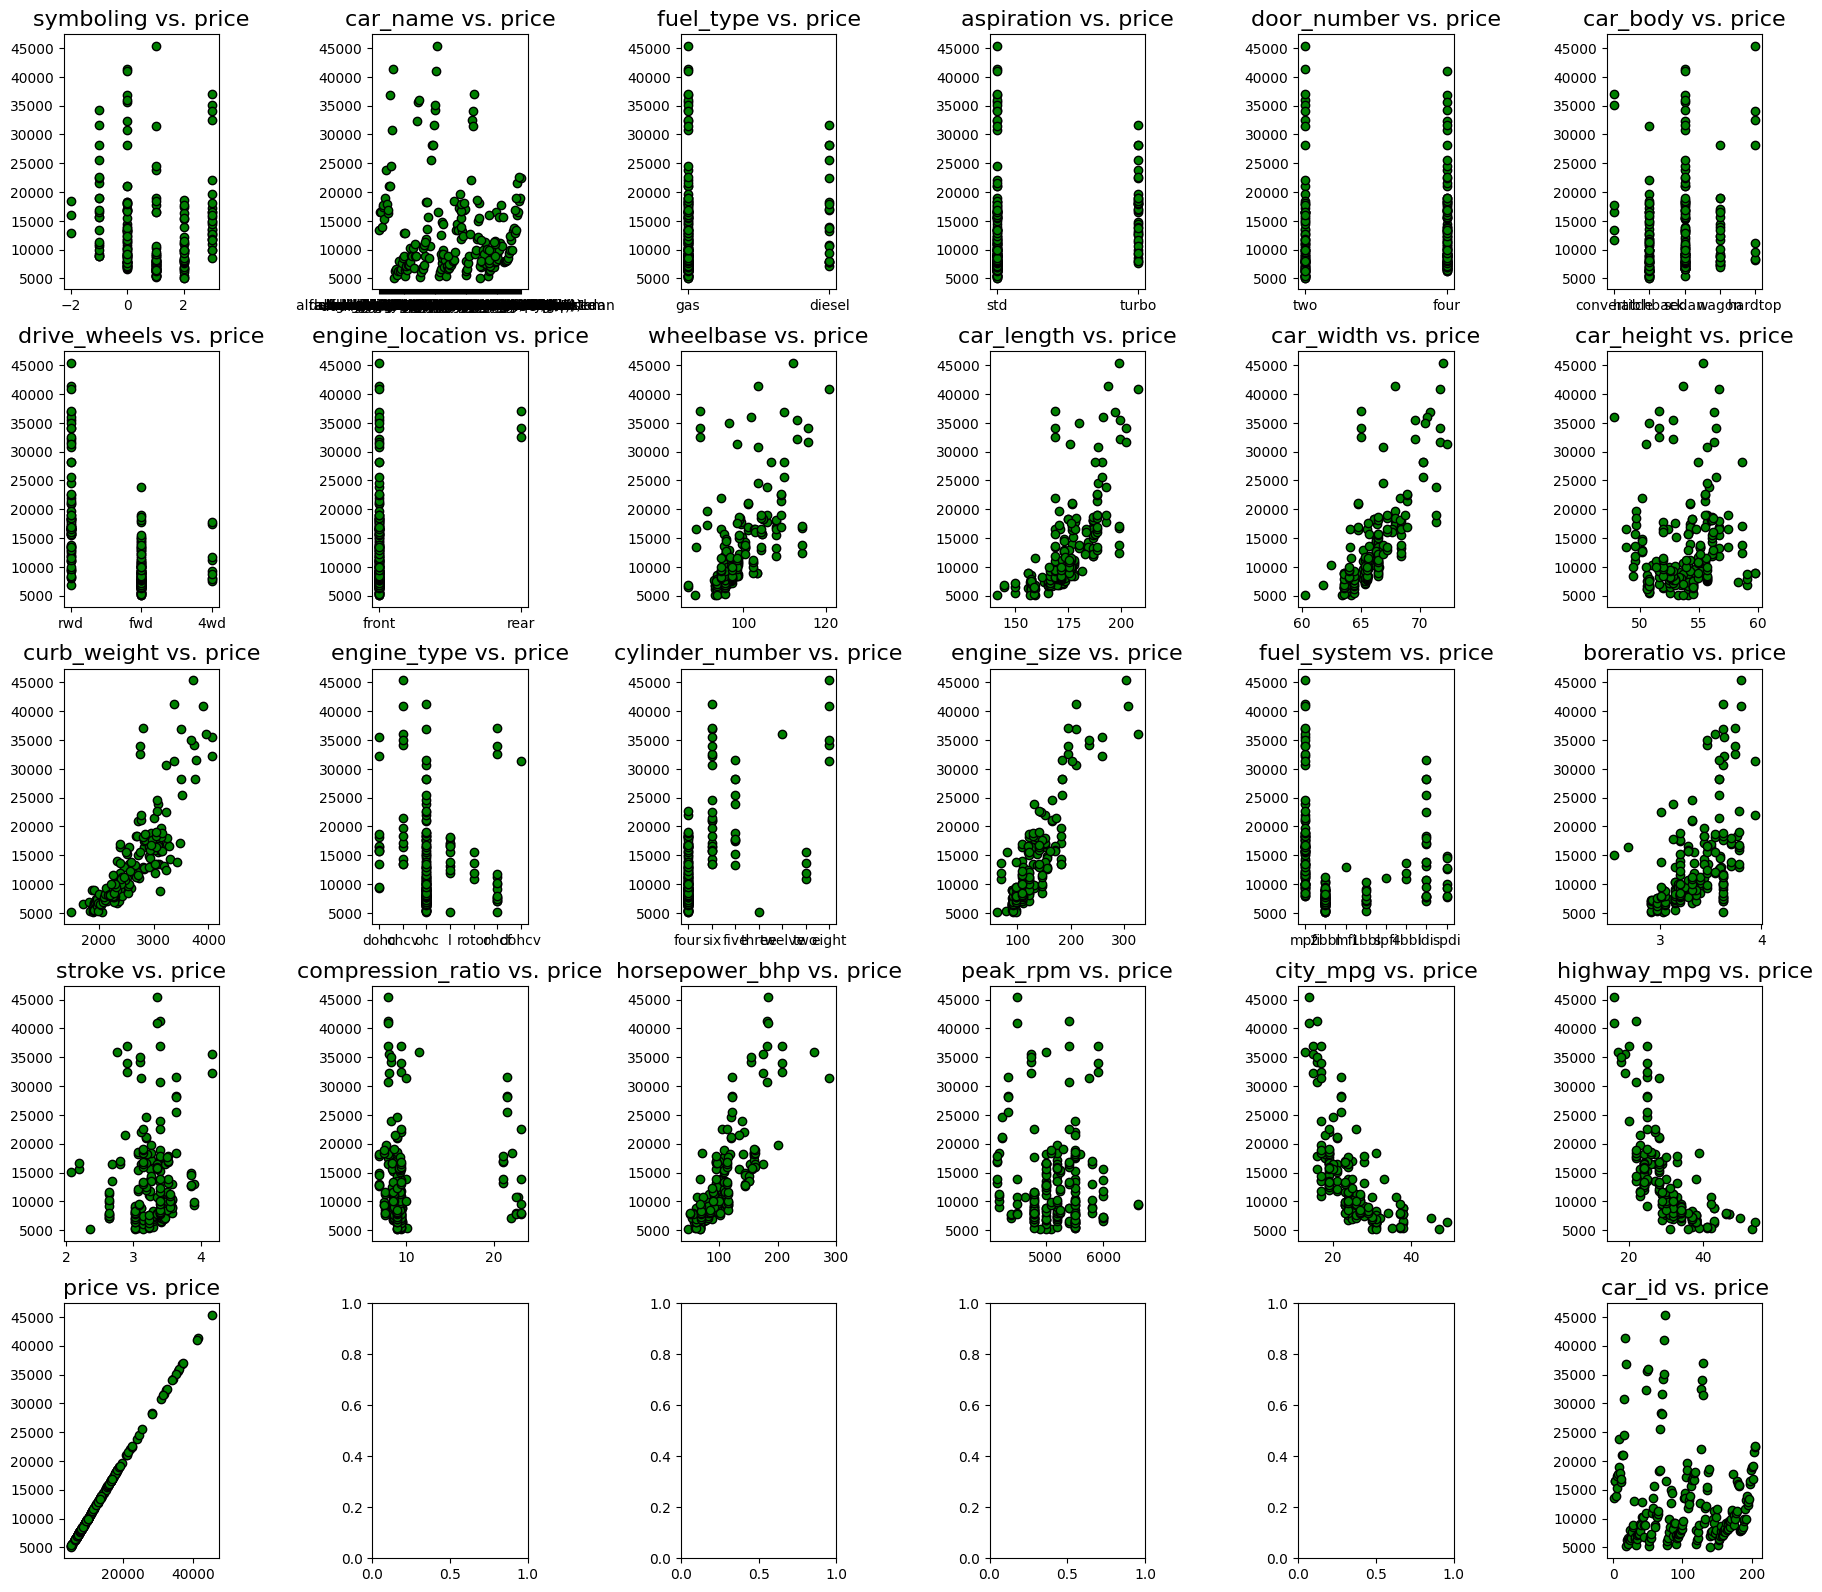

In [19]:
fig, axs = plt.subplots(5,6, figsize=(18,16),)
fig.subplots_adjust(hspace = 0.5, wspace=0.5)
axs = axs.ravel()

for index, column in enumerate(car_df.columns):
    axs[index-1].set_title("{} vs. price".format(column),fontsize=16)
    axs[index-1].scatter(x=car_df[column],y=car_df['price'],color='green',edgecolor='k')

fig.tight_layout(pad=1)

From the above analysis, it appers that most of our data have a linear relationship. we then move to check for multicollinearity.

### Checking for multicollinearity


Multicollinearity occurs when predictor variables in a dataset are highly correlated with each other. This is problematic because it:

1.  Reduces the precision of coefficient estimates (making them less reliable and widening their confidence intervals).
2.  Makes it hard to isolate the individual effect of each predictor on the outcome variable, as the estimated effects become unstable and highly sensitive to minor changes in the model or data.

We'll check for multicollinearity using scatter plots to visualize pairwise relationships between predictors and a correlation heatmap to summarize all pairwise correlations.


In [20]:
num_col = car_df.select_dtypes(include=np.number)
num_col

,car_id,symboling,wheelbase,car_length,car_width,car_height,curb_weight,engine_size,boreratio,stroke,compression_ratio,horsepower_bhp,peak_rpm,city_mpg,highway_mpg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [21]:
corr_mat=num_col.corr()
corr_mat['price'].sort_values(ascending=False)


,price
price,1.000000
engine_size,0.874145
curb_weight,0.835305
horsepower_bhp,0.808139
car_width,0.759325
car_length,0.682920
wheelbase,0.577816
boreratio,0.553173
car_height,0.119336
stroke,0.079443


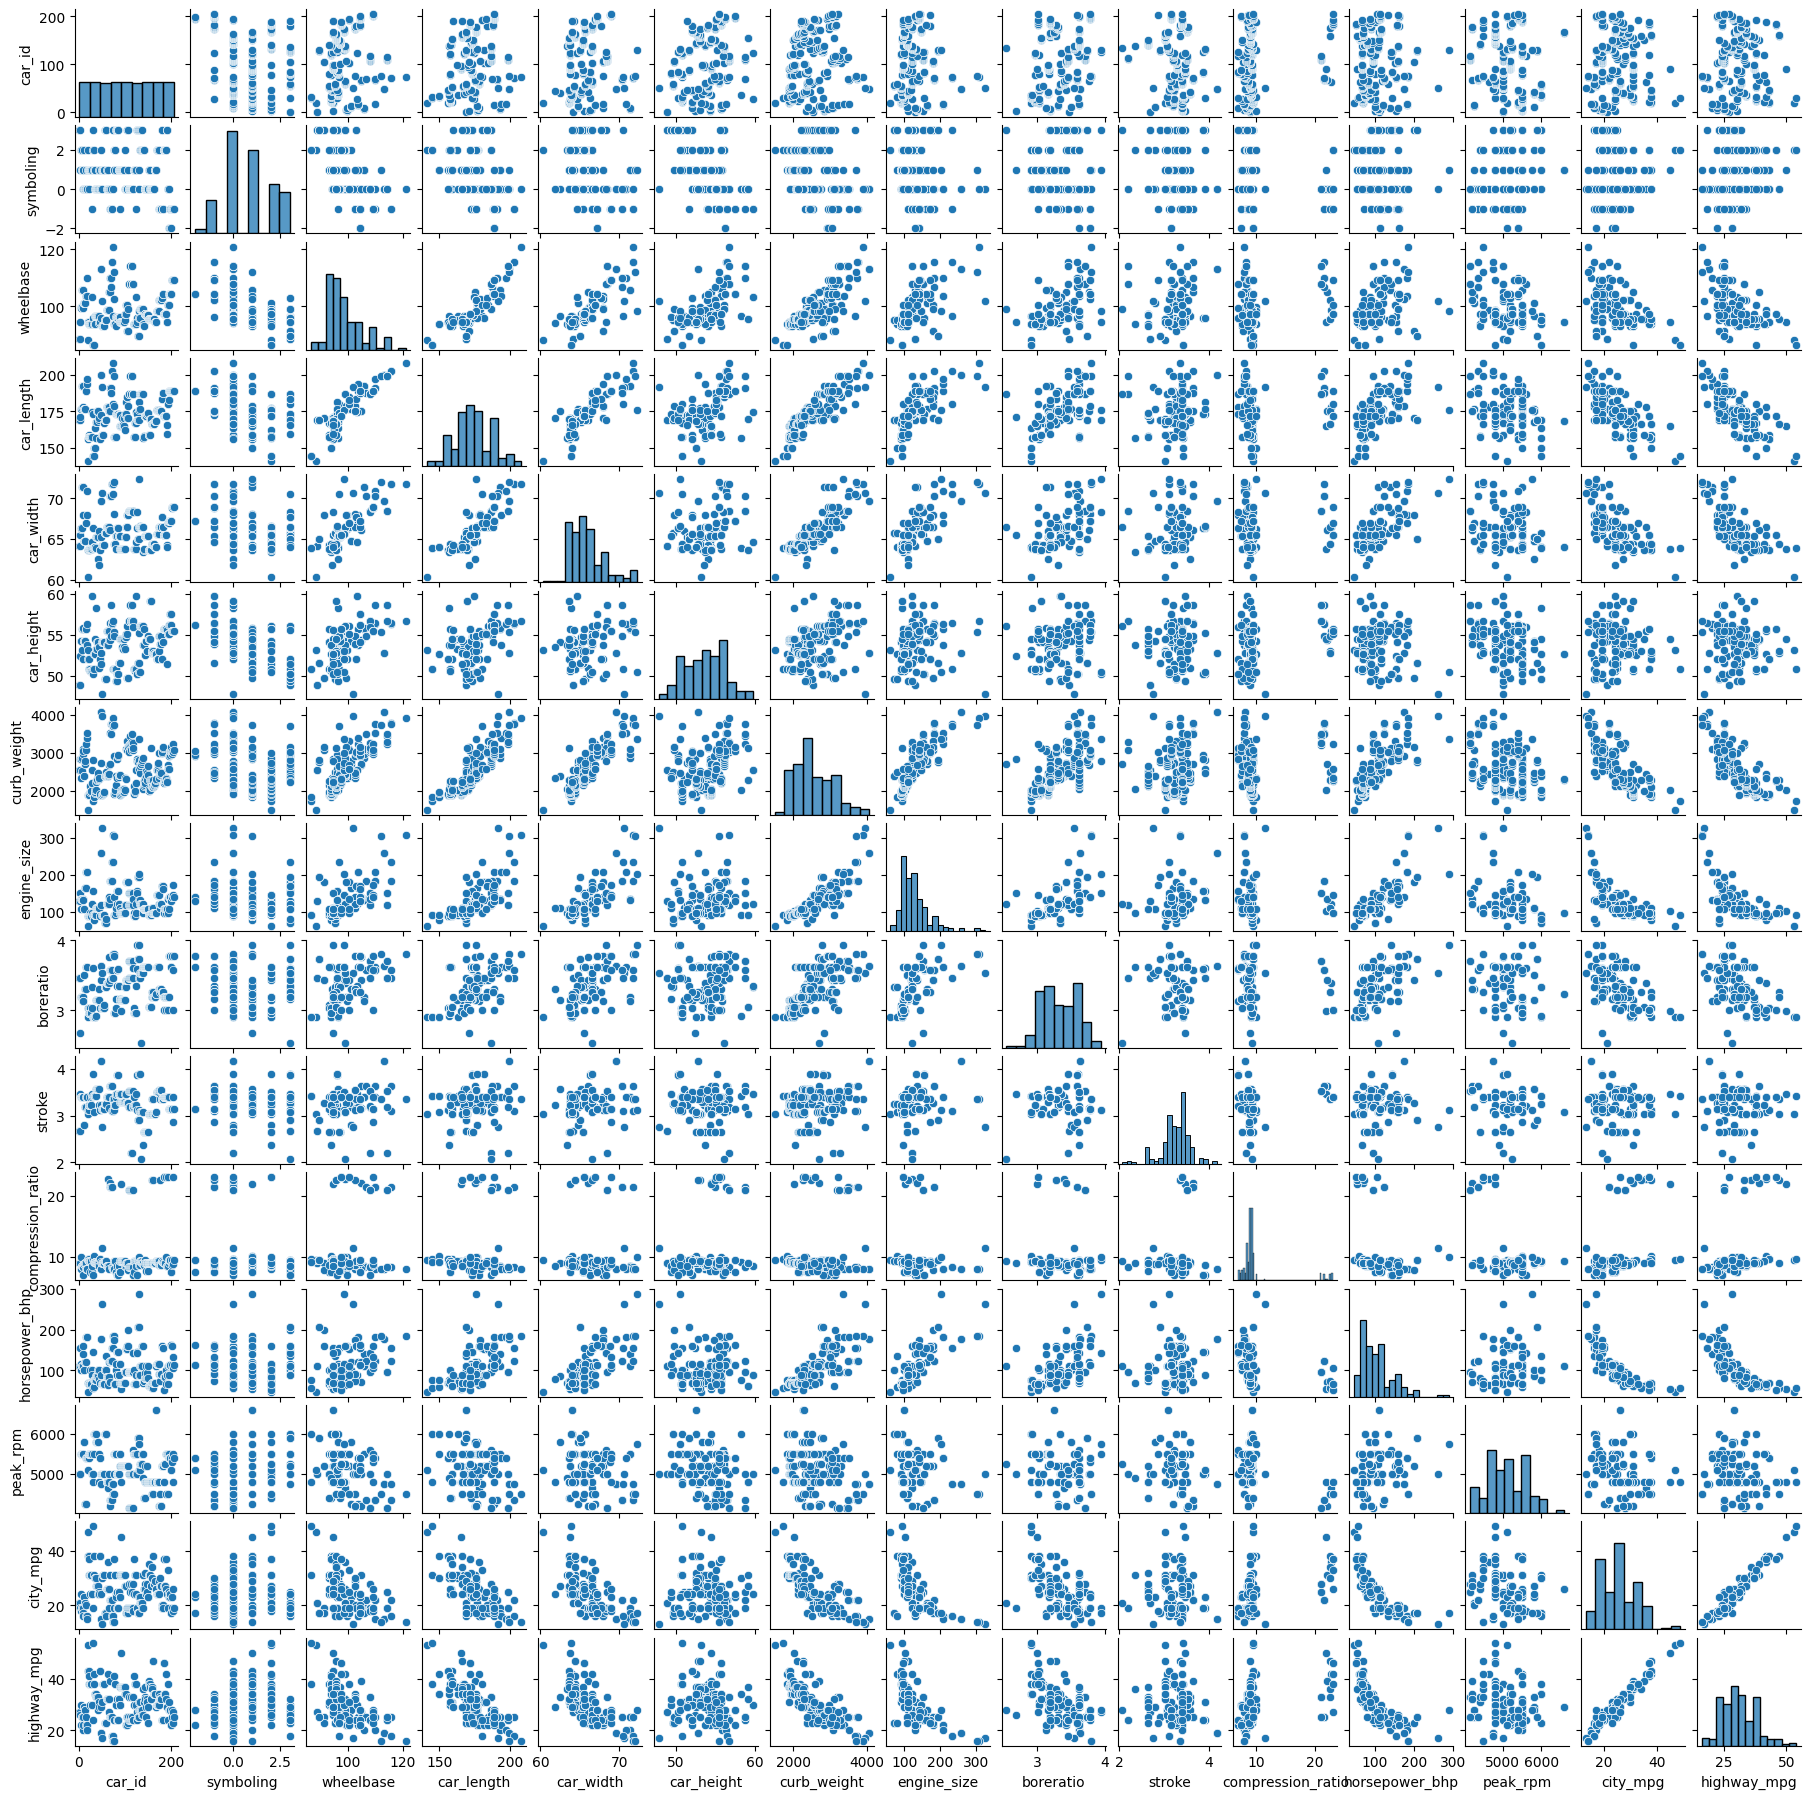

In [22]:
from seaborn import pairplot
g = pairplot(num_col.drop('price', axis='columns'))
g.fig.set_size_inches(18,18)

In [ ]:
df1 = num_col.drop('price', axis='columns').corr()
from statsmodels.graphics.correlation import plot_corr
fig = plot_corr(df1, xnames = df1.columns, ynames = df1.columns)
fig.set_size_inches(18,18)

High Cardinality

In [23]:
car_df.select_dtypes(include='object').nunique()

,0
car_name,147
fuel_type,2
aspiration,2
door_number,2
car_body,5
drive_wheels,3
engine_location,2
engine_type,7
cylinder_number,7
fuel_system,8


In [24]:
car_df.drop('car_name', axis='columns', inplace=True)

In [25]:
car_df.head()

,car_id,symboling,fuel_type,aspiration,door_number,car_body,drive_wheels,engine_location,wheelbase,car_length,...,engine_size,fuel_system,boreratio,stroke,compression_ratio,horsepower_bhp,peak_rpm,city_mpg,highway_mpg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Splitting Data

In [46]:
X = car_df.iloc[:, :-1]
X.head()

,car_id,symboling,fuel_type,aspiration,door_number,car_body,drive_wheels,engine_location,wheelbase,car_length,...,cylinder_number,engine_size,fuel_system,boreratio,stroke,compression_ratio,horsepower_bhp,peak_rpm,city_mpg,highway_mpg
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [27]:
y = car_df.iloc[:, -1]
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


Encoding

In [47]:
# Non Numeric data needs to be converted into numeric data using One Hot Encoding
string_columns = list(car_df.select_dtypes("object").columns)

string_columns


['fuel_type',
 'aspiration',
 'door_number',
 'car_body',
 'drive_wheels',
 'engine_location',
 'engine_type',
 'cylinder_number',
 'fuel_system']

In [48]:
X_dum1 = pd.get_dummies(X, columns=string_columns, dtype=int)


In [49]:
X_dum1.columns

Index(['car_id', 'symboling', 'wheelbase', 'car_length', 'car_width',
       'car_height', 'curb_weight', 'engine_size', 'boreratio', 'stroke',
       'compression_ratio', 'horsepower_bhp', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'fuel_type_diesel', 'fuel_type_gas', 'aspiration_std',
       'aspiration_turbo', 'door_number_four', 'door_number_two',
       'car_body_convertible', 'car_body_hardtop', 'car_body_hatchback',
       'car_body_sedan', 'car_body_wagon', 'drive_wheels_4wd',
       'drive_wheels_fwd', 'drive_wheels_rwd', 'engine_location_front',
       'engine_location_rear', 'engine_type_dohc', 'engine_type_dohcv',
       'engine_type_l', 'engine_type_ohc', 'engine_type_ohcf',
       'engine_type_ohcv', 'engine_type_rotor', 'cylinder_number_eight',
       'cylinder_number_five', 'cylinder_number_four', 'cylinder_number_six',
       'cylinder_number_three', 'cylinder_number_twelve',
       'cylinder_number_two', 'fuel_system_1bbl', 'fuel_system_2bbl',
       'fuel_system_4

In [50]:
X_dum1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_id                  205 non-null    int64  
 1   symboling               205 non-null    int64  
 2   wheelbase               205 non-null    float64
 3   car_length              205 non-null    float64
 4   car_width               205 non-null    float64
 5   car_height              205 non-null    float64
 6   curb_weight             205 non-null    int64  
 7   engine_size             205 non-null    int64  
 8   boreratio               205 non-null    float64
 9   stroke                  205 non-null    float64
 10  compression_ratio       205 non-null    float64
 11  horsepower_bhp          205 non-null    int64  
 12  peak_rpm                205 non-null    int64  
 13  city_mpg                205 non-null    int64  
 14  highway_mpg             205 non-null    in

In [51]:
car_df1 = pd.concat([X, y], axis=1)

In [33]:
car_df1.shape

(205, 54)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((164, 53), (41, 53), (164,), (41,))

We proceed to fit the model using ols

In [34]:
import statsmodels.formula.api as smf
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [36]:
formula_str = "price ~ " + " + ".join(car_df1.columns[:-1])
formula_str


'price ~ car_id + symboling + wheelbase + car_length + car_width + car_height + curb_weight + engine_size + boreratio + stroke + compression_ratio + horsepower_bhp + peak_rpm + city_mpg + highway_mpg + fuel_type_diesel + fuel_type_gas + aspiration_std + aspiration_turbo + door_number_four + door_number_two + car_body_convertible + car_body_hardtop + car_body_hatchback + car_body_sedan + car_body_wagon + drive_wheels_4wd + drive_wheels_fwd + drive_wheels_rwd + engine_location_front + engine_location_rear + engine_type_dohc + engine_type_dohcv + engine_type_l + engine_type_ohc + engine_type_ohcf + engine_type_ohcv + engine_type_rotor + cylinder_number_eight + cylinder_number_five + cylinder_number_four + cylinder_number_six + cylinder_number_three + cylinder_number_twelve + cylinder_number_two + fuel_system_1bbl + fuel_system_2bbl + fuel_system_4bbl + fuel_system_idi + fuel_system_mfi + fuel_system_mpfi + fuel_system_spdi + fuel_system_spfi'

In [37]:
model = smf.ols(formula=formula_str, data = car_df1)
results = model.fit()

When setting up a machine learning model, we often use a formula to define the relationship between variables. This formula usually looks like y ~ X, where y is the outcome we're trying to predict (the response variable) and X represents the factors we think influence that outcome (the predictor variables). This is read as "model y as a function of X" or regress y on X.

Python's statsmodels library uses this same formula style. To build a regression model in statsmodels, we create a string following this pattern. For instance, y ~ X1 + X2 means we're modeling y based on two predictors, X1 and X2.

In [38]:
# Predict on test data
y_pred = results.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 5557816.145305418
R-squared: 0.9295980102941835


In [39]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     68.93
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           1.05e-83
Time:                        06:57:12   Log-Likelihood:                -1831.4
No. Observations:                 205   AIC:                             3749.
Df Residuals:                     162   BIC:                             3892.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.21

## Further Check

In the following section, we will evaluate the performance of a regression model by analyzing its residuals. This involves checking if the residuals are independent, exhibit constant variance (homoscedasticity), follow a normal distribution, and are free from problematic outliers. We will use graphical methods, such as plotting residuals against predictor variables and fitted values, along with histograms and Q-Q plots to assess normality. Additionally, Cook's distance will be employed to detect influential outliers that may disproportionately affect the model.


### Checking for Independence

After checking predictor variables for linearity and multicollinearity, we now assess the model's quality by examining three statistical phenomena related to its fit.

The first check involves plotting residuals (the difference between observed and predicted values) against predictor variables. This helps confirm the independence assumption, which requires residuals to be independent of each other. Independent residuals should show:

- A random, even distribution around the horizontal zero line.
- No distinct patterns or cluster

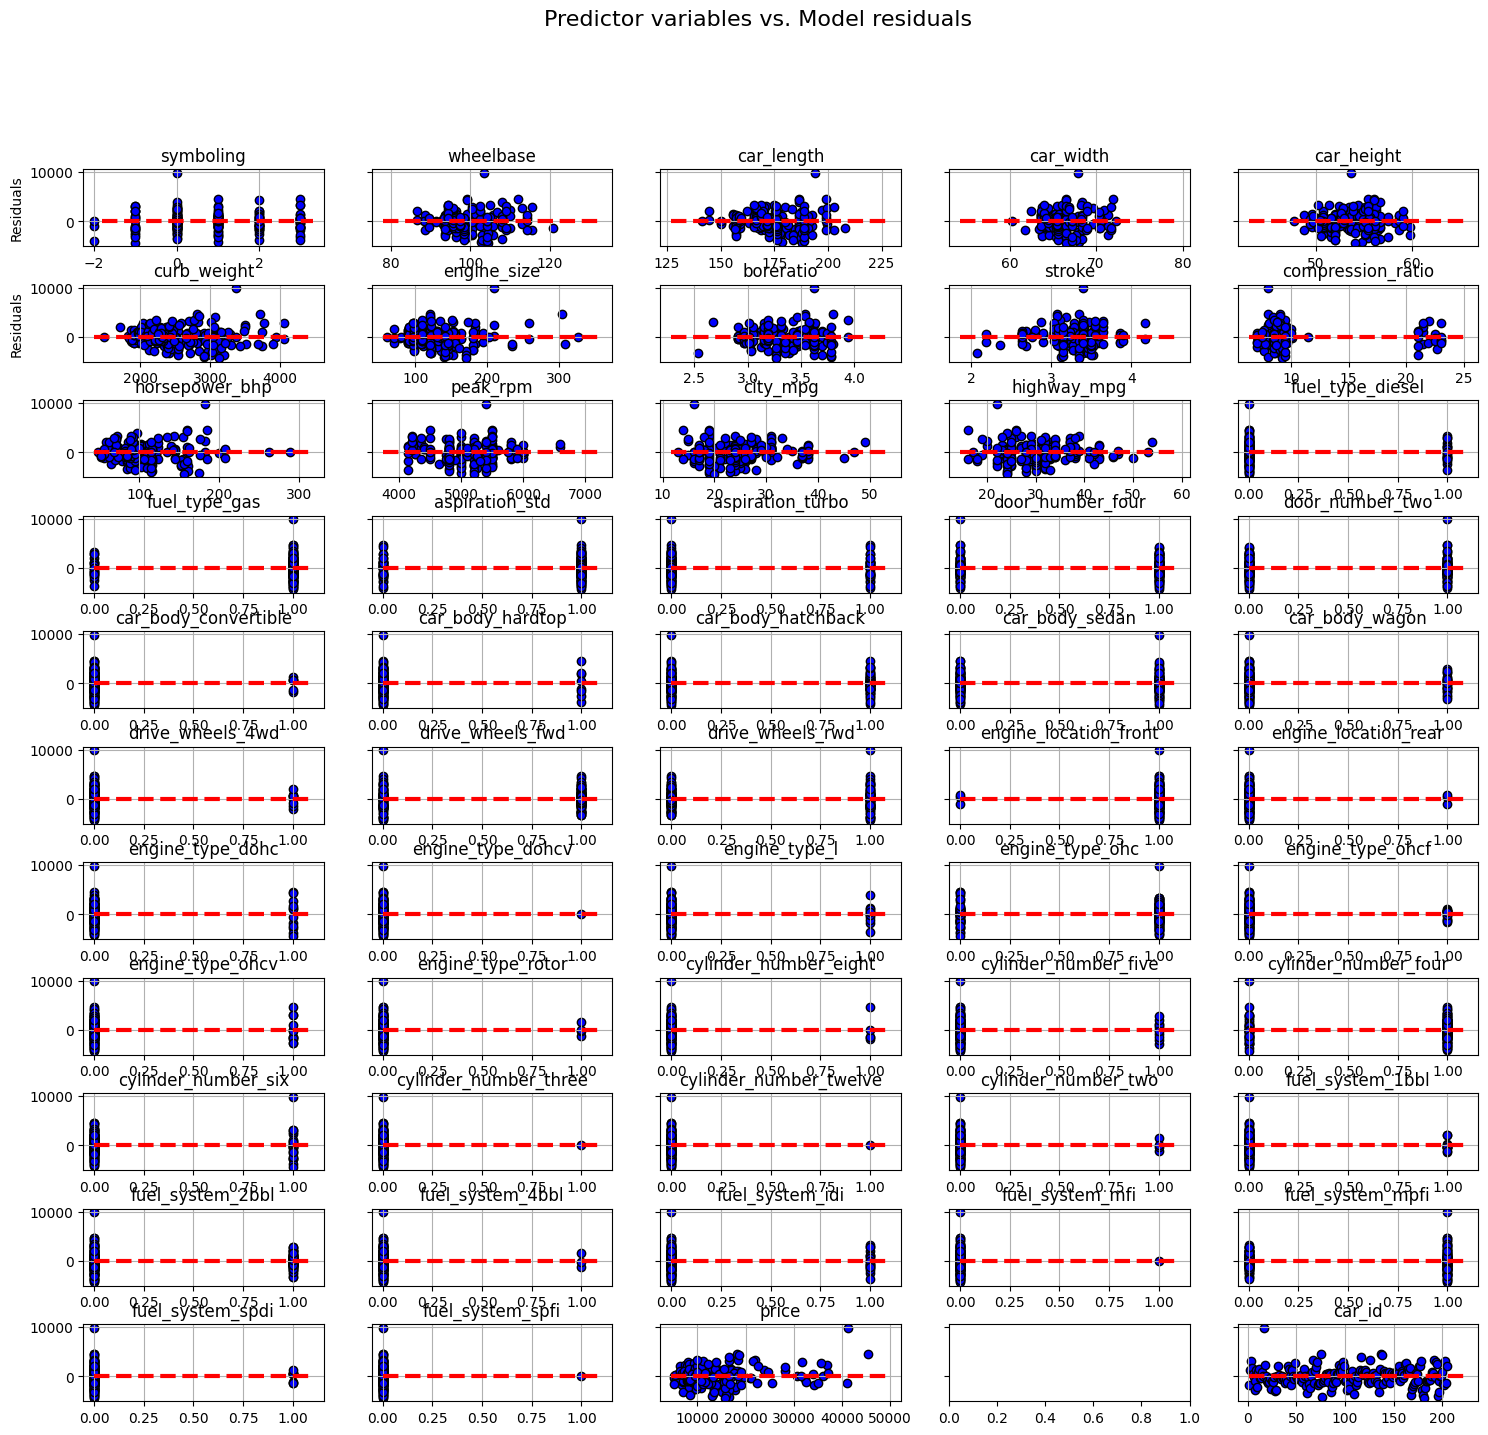

In [40]:
fig, axs = plt.subplots(11,5, figsize=(18,16),sharey=True)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
fig.suptitle('Predictor variables vs. Model residuals', fontsize=16)
axs = axs.ravel()

for index, column in enumerate(car_df1.columns):
    axs[index-1].set_title("{}".format(column),fontsize=12)
    axs[index-1].scatter(x=car_df1[column], y=results.resid, color='blue', edgecolor='k')
    axs[index-1].grid(True)
    xmin = min(car_df1[column])
    xmax = max(car_df1[column])
    axs[index-1].hlines(y=0, xmin=xmin*0.9, xmax=xmax*1.1, color='red', linestyle='--',lw=3)
    if index == 1 or index == 6:
        axs[index-1].set_ylabel('Residuals')

We can see that there is a warning about strong multicollinearity. This is likely as a result of the incorrect filtering of hot-encoded dummy variables.

We will repeat the dummy variable encoding with drop_first parameter
In order to ensure that we don't assume an underlying relationship between the categories, we can call pd.get_dummies with the argument drop_first=True so that we only create n-1 columns for each variable with n categories.

In [56]:
X_dum2 = pd.get_dummies(X, columns=string_columns, dtype=int, drop_first=True)

# Again make sure that all the column names have underscores instead of whitespaces
X_dum2.columns = [col.replace(" ", "_") for col in X_dum2.columns]


X_dum2.head()

,car_id,symboling,wheelbase,car_length,car_width,car_height,curb_weight,engine_size,boreratio,stroke,...,cylinder_number_three,cylinder_number_twelve,cylinder_number_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [58]:
car_df2 = pd.concat([X_dum2, y], axis=1)

# Reorder columns with the dependent variable (claim_amount) the last column
column_titles = [col for col in car_df2.columns if col !=
                 'price'] + ['price']
car_df2 = car_df2.reindex(columns=column_titles)
car_df2.head()

,car_id,symboling,wheelbase,car_length,car_width,car_height,curb_weight,engine_size,boreratio,stroke,...,cylinder_number_twelve,cylinder_number_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,1,0,0,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,1,0,0,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,1,0,0,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,1,0,0,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,1,0,0,17450.0


We now have 44 predictor variables to choose from, so we need a way of guiding us to choose the best ones to be our predictors.

One way is to look at the correlations between the price and each variable in our DataFrame and select those with the strongest correlations – both positive and negative.

We also need to consider how significant those features are.

In [59]:
# Calculate correlations between predictor variables and the response variable
corrs = car_df2.corr()['price'].sort_values(ascending=False)

In [60]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'price']

for col in column_titles:
    p_val = round(pearsonr(car_df2[col], car_df2['price'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}

df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
engine_size,0.874145,0.000000
city_mpg,-0.685751,0.000000
drive_wheels_fwd,-0.601950,0.000000
fuel_system_2bbl,-0.501374,0.000000
engine_type_ohc,-0.344270,0.000000
highway_mpg,-0.697599,0.000000
engine_type_ohcv,0.385991,0.000000
cylinder_number_six,0.474978,0.000000
cylinder_number_four,-0.697762,0.000000
boreratio,0.553173,0.000000


Strong Predictors of Price
Variables with high absolute correlation coefficients (|r| > 0.7) and very low p-values (< 0.01) are strong predictors of price. These include:

- engine_size (r = 0.874)
- horsepower_bhp (r = 0.808)
- curb_weight (r = 0.835)
- car_width (r = 0.759)

These variables have strong relationships with price and are statistically significant.

2. Moderate Predictors of Price
Variables with moderate correlation (0.4 ≤ |r| < 0.7) and significant p-values include:

- city_mpg (r = -0.686)
- highway_mpg (r = -0.698)
- drive_wheels_rwd (r = 0.639)
- boreratio (r = 0.553)
- wheelbase (r = 0.578)

Let's keep only the variables that have a significant correlation with the dependent variable. We'll put them into an independent variable DataFrame `X`:


In [61]:
y_name = 'price'
# The dependent variable remains the same:
y_data = car_df2[y_name]

# Model building – Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = car_df2[X_names]
print('Dependent Variable:\n\t{}'.format(y_name))
print('Independent Variables:\n\t{}'.format(X_names))

Dependent Variable:
	price
Independent Variables:
	['engine_size', 'curb_weight', 'horsepower_bhp', 'car_width', 'car_length', 'drive_wheels_rwd', 'wheelbase', 'boreratio', 'fuel_system_mpfi', 'cylinder_number_six', 'engine_type_ohcv', 'engine_location_rear', 'cylinder_number_five', 'car_body_hardtop', 'cylinder_number_twelve', 'aspiration_turbo', 'engine_type_dohcv', 'car_body_hatchback', 'engine_type_ohc', 'fuel_system_2bbl', 'drive_wheels_fwd', 'city_mpg', 'highway_mpg', 'cylinder_number_four']


In [63]:
X_data.shape

(205, 24)

We also need to look for predictor variable pairs which have a high correlation with each other to avoid autocorrelation.

In [65]:
# Create the correlation matrix
corr = X_data.corr()

# Find rows and columns where correlation coefficients > 0.8 or <-0.8
corr[np.abs(corr) > 0.8]

,engine_size,curb_weight,horsepower_bhp,car_width,car_length,drive_wheels_rwd,wheelbase,boreratio,fuel_system_mpfi,cylinder_number_six,...,cylinder_number_twelve,aspiration_turbo,engine_type_dohcv,car_body_hatchback,engine_type_ohc,fuel_system_2bbl,drive_wheels_fwd,city_mpg,highway_mpg,cylinder_number_four
engine_size,1.000000,0.850594,0.809769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
curb_weight,0.850594,1.000000,NaN,0.867032,0.877728,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
horsepower_bhp,0.809769,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.801456,NaN,NaN
car_width,NaN,0.867032,NaN,1.000000,0.841118,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_length,NaN,0.877728,NaN,0.841118,1.000000,NaN,0.874587,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drive_wheels_rwd,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.911996,NaN,NaN,NaN
wheelbase,NaN,NaN,NaN,NaN,0.874587,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
boreratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_system_mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinder_number_six,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# As before, we create the correlation matrix
# and find rows and columns where correlation coefficients > 0.8 or <-0.8
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.8)

# We are only interested in the off-diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off-diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

,curb_weight,horsepower_bhp,engine_size,car_width,car_length,engine_size,city_mpg,curb_weight,car_length,curb_weight,car_width,wheelbase,drive_wheels_fwd,car_length,drive_wheels_rwd,horsepower_bhp,highway_mpg,city_mpg
engine_size,0.850594,0.809769,1.000000,0.735433,0.683360,1.000000,-0.653658,0.850594,0.683360,0.850594,0.735433,0.569329,-0.518391,0.683360,0.565509,0.809769,-0.677470,-0.653658
engine_size,0.850594,0.809769,1.000000,0.735433,0.683360,1.000000,-0.653658,0.850594,0.683360,0.850594,0.735433,0.569329,-0.518391,0.683360,0.565509,0.809769,-0.677470,-0.653658
curb_weight,1.000000,0.750739,0.850594,0.867032,0.877728,0.850594,-0.757414,1.000000,0.877728,1.000000,0.867032,0.776386,-0.666039,0.877728,0.669987,0.750739,-0.797465,-0.757414
curb_weight,1.000000,0.750739,0.850594,0.867032,0.877728,0.850594,-0.757414,1.000000,0.877728,1.000000,0.867032,0.776386,-0.666039,0.877728,0.669987,0.750739,-0.797465,-0.757414
curb_weight,1.000000,0.750739,0.850594,0.867032,0.877728,0.850594,-0.757414,1.000000,0.877728,1.000000,0.867032,0.776386,-0.666039,0.877728,0.669987,0.750739,-0.797465,-0.757414
horsepower_bhp,0.750739,1.000000,0.809769,0.640732,0.552623,0.809769,-0.801456,0.750739,0.552623,0.750739,0.640732,0.353294,-0.544438,0.552623,0.575564,1.000000,-0.770544,-0.801456
horsepower_bhp,0.750739,1.000000,0.809769,0.640732,0.552623,0.809769,-0.801456,0.750739,0.552623,0.750739,0.640732,0.353294,-0.544438,0.552623,0.575564,1.000000,-0.770544,-0.801456
car_width,0.867032,0.640732,0.735433,1.000000,0.841118,0.735433,-0.642704,0.867032,0.841118,0.867032,1.000000,0.795144,-0.472116,0.841118,0.511149,0.640732,-0.677218,-0.642704
car_width,0.867032,0.640732,0.735433,1.000000,0.841118,0.735433,-0.642704,0.867032,0.841118,0.867032,1.000000,0.795144,-0.472116,0.841118,0.511149,0.640732,-0.677218,-0.642704
car_length,0.877728,0.552623,0.683360,0.841118,1.000000,0.683360,-0.670909,0.877728,1.000000,0.877728,0.841118,0.874587,-0.508714,1.000000,0.538370,0.552623,-0.704662,-0.670909


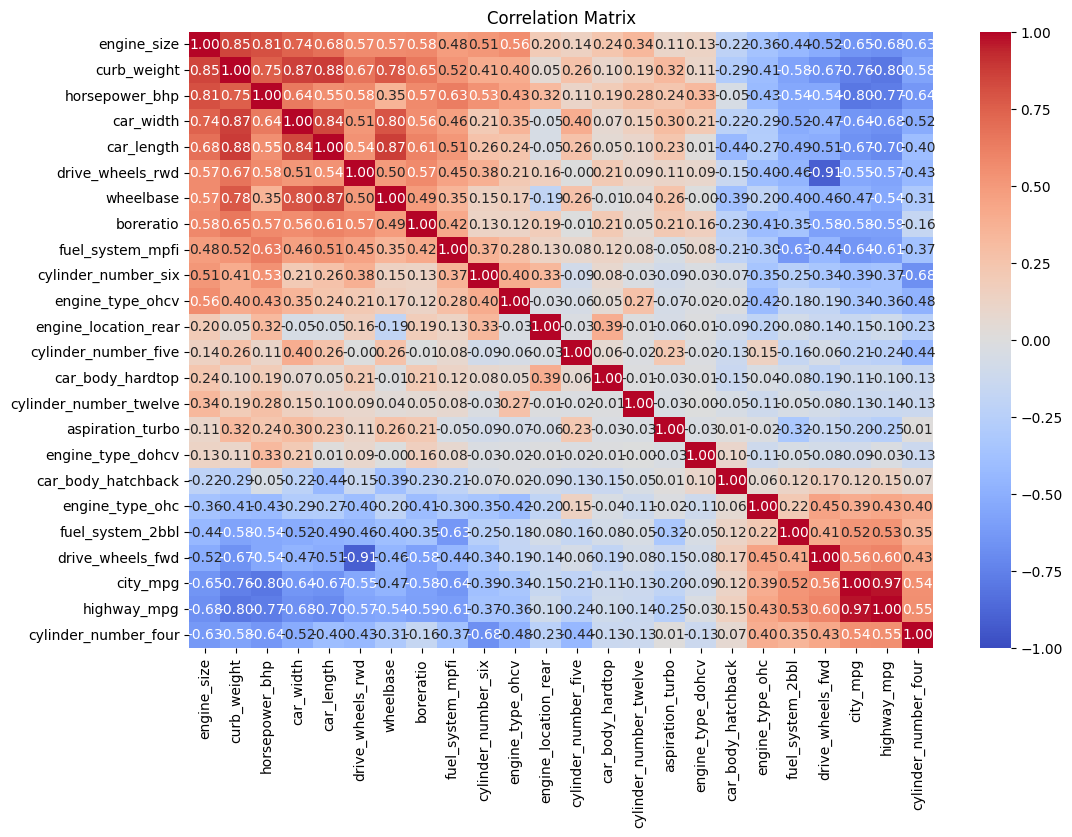

In [68]:
#Visualizing to getter better info

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [69]:
# Let's take a new subset of our potential independent variables
X_remove = ['engine_size', 'car_length', 'horsepower_bhp', 'city_mpg']

X_corr_names = [col for col in X_names if col not in X_remove]

# Create our new OLS formula based upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

Formula:
	price ~ curb_weight + car_width + drive_wheels_rwd + wheelbase + boreratio + fuel_system_mpfi + cylinder_number_six + engine_type_ohcv + engine_location_rear + cylinder_number_five + car_body_hardtop + cylinder_number_twelve + aspiration_turbo + engine_type_dohcv + car_body_hatchback + engine_type_ohc + fuel_system_2bbl + drive_wheels_fwd + highway_mpg + cylinder_number_four


In [71]:
# Fit the OLS model using the model DataFrame
model=smf.ols(formula=formula_str, data=car_df2)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     63.25
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           2.18e-71
Time:                        08:21:41   Log-Likelihood:                -1920.9
No. Observations:                 205   AIC:                             3884.
Df Residuals:                     184   BIC:                             3954.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -5.59

Variance thresholds remove features whose values don't change much from observation to observation.

The objective here is to remove all features that have a variance lower than the selected threshold.

In [74]:
# Separate data into independent (X) and independent (y) variables
X_names = list(car_df2.columns)
X_names.remove(y_name)
X_data = car_df2[X_names]
y_data = car_df2[y_name]

In [77]:
print('Dependent Variable:\n\t{}'.format(y_name))
print('Independent Variables:\n\t{}'.format(X_names))

Dependent Variable:
	price
Independent Variables:
	['car_id', 'symboling', 'wheelbase', 'car_length', 'car_width', 'car_height', 'curb_weight', 'engine_size', 'boreratio', 'stroke', 'compression_ratio', 'horsepower_bhp', 'peak_rpm', 'city_mpg', 'highway_mpg', 'fuel_type_gas', 'aspiration_turbo', 'door_number_two', 'car_body_hardtop', 'car_body_hatchback', 'car_body_sedan', 'car_body_wagon', 'drive_wheels_fwd', 'drive_wheels_rwd', 'engine_location_rear', 'engine_type_dohcv', 'engine_type_l', 'engine_type_ohc', 'engine_type_ohcf', 'engine_type_ohcv', 'engine_type_rotor', 'cylinder_number_five', 'cylinder_number_four', 'cylinder_number_six', 'cylinder_number_three', 'cylinder_number_twelve', 'cylinder_number_two', 'fuel_system_2bbl', 'fuel_system_4bbl', 'fuel_system_idi', 'fuel_system_mfi', 'fuel_system_mpfi', 'fuel_system_spdi', 'fuel_system_spfi']


In [75]:
car_df2.columns

Index(['car_id', 'symboling', 'wheelbase', 'car_length', 'car_width',
       'car_height', 'curb_weight', 'engine_size', 'boreratio', 'stroke',
       'compression_ratio', 'horsepower_bhp', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'fuel_type_gas', 'aspiration_turbo', 'door_number_two',
       'car_body_hardtop', 'car_body_hatchback', 'car_body_sedan',
       'car_body_wagon', 'drive_wheels_fwd', 'drive_wheels_rwd',
       'engine_location_rear', 'engine_type_dohcv', 'engine_type_l',
       'engine_type_ohc', 'engine_type_ohcf', 'engine_type_ohcv',
       'engine_type_rotor', 'cylinder_number_five', 'cylinder_number_four',
       'cylinder_number_six', 'cylinder_number_three',
       'cylinder_number_twelve', 'cylinder_number_two', 'fuel_system_2bbl',
       'fuel_system_4bbl', 'fuel_system_idi', 'fuel_system_mfi',
       'fuel_system_mpfi', 'fuel_system_spdi', 'fuel_system_spfi', 'price'],
      dtype='object')

Variance thresholds remove **features whose values don't change much** from observation to observation.

The objective here is to **remove** all features that have a **variance lower than** the selected **threshold**.

since variance threshold is dependent on scale we will have to normalize our data before carrying it out.

In [76]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)


To implement variance threshold in Scikit Learn we have to do the following:

- Import and create an instance of the `VarianceThreshold` class.
- Use the `.fit()` method to select a subset of features based on the threshold.

In [78]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

The variance threshold has been applied to the data. Let's look at the **calculated variance for each predictive variable**:

In [79]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
20,car_body_sedan,0.248995
41,fuel_system_mpfi,0.248281
17,door_number_two,0.246282
22,drive_wheels_fwd,0.242713
23,drive_wheels_rwd,0.233290
19,car_body_hatchback,0.224866
37,fuel_system_2bbl,0.218299
27,engine_type_ohc,0.200738
32,cylinder_number_four,0.174039
16,aspiration_turbo,0.147912


The above table shows the variances of the individual columns before any threshold is applied. It allows us to **revise our initial variance threshold** if we feel that we might exclude important variables.


Next we need to **extract the results** and use them to **select our new columns** – which form a subset of all the columns:

In [80]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

,car_id,symboling,wheelbase,car_length,car_width,car_height,curb_weight,boreratio,compression_ratio,peak_rpm,...,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,cylinder_number_five,cylinder_number_four,cylinder_number_six,fuel_system_2bbl,fuel_system_idi,fuel_system_mpfi,fuel_system_spdi
0,0.000000,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.1250,0.346939,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.004902,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.1250,0.346939,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.009804,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.100000,0.1250,0.346939,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.014706,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.464286,0.1875,0.551020,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.019608,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.464286,0.0625,0.551020,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [81]:
X_new.shape

(205, 32)

### Experimenting with different thresholds

In [82]:
# Create Variance Threshold objects
selector_1 = VarianceThreshold(threshold=0.05)
selector_2 = VarianceThreshold(threshold=0.1)
selector_3 = VarianceThreshold(threshold=0.15)

In [83]:
selector_1.fit(X_normalize)

VarianceThreshold(threshold=0.05)

In [84]:
selector_2.fit(X_normalize)

VarianceThreshold(threshold=0.1)

In [85]:
selector_3.fit(X_normalize)

VarianceThreshold(threshold=0.15)

In [86]:
# Select subset of columns
X_1 = X_normalize[X_normalize.columns[selector_1.get_support(indices=True)]]
X_2 = X_normalize[X_normalize.columns[selector_2.get_support(indices=True)]]
X_3 = X_normalize[X_normalize.columns[selector_3.get_support(indices=True)]]

In [91]:
X_1.columns

Index(['car_id', 'symboling', 'compression_ratio', 'fuel_type_gas',
       'aspiration_turbo', 'door_number_two', 'car_body_hatchback',
       'car_body_sedan', 'car_body_wagon', 'drive_wheels_fwd',
       'drive_wheels_rwd', 'engine_type_l', 'engine_type_ohc',
       'engine_type_ohcf', 'engine_type_ohcv', 'cylinder_number_five',
       'cylinder_number_four', 'cylinder_number_six', 'fuel_system_2bbl',
       'fuel_system_idi', 'fuel_system_mpfi'],
      dtype='object')

In [92]:
X_2.columns

Index(['aspiration_turbo', 'door_number_two', 'car_body_hatchback',
       'car_body_sedan', 'car_body_wagon', 'drive_wheels_fwd',
       'drive_wheels_rwd', 'engine_type_ohc', 'cylinder_number_four',
       'cylinder_number_six', 'fuel_system_2bbl', 'fuel_system_mpfi'],
      dtype='object')

In [93]:
X_3.columns

Index(['door_number_two', 'car_body_hatchback', 'car_body_sedan',
       'drive_wheels_fwd', 'drive_wheels_rwd', 'engine_type_ohc',
       'cylinder_number_four', 'fuel_system_2bbl', 'fuel_system_mpfi'],
      dtype='object')

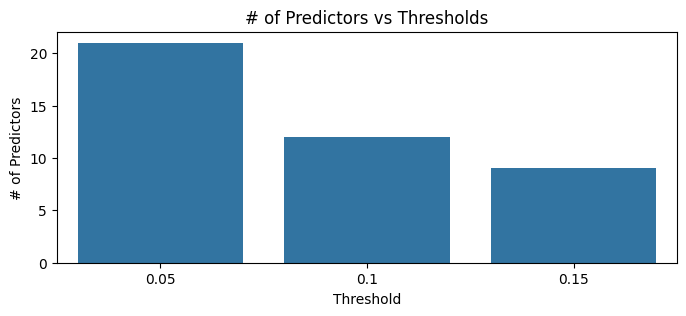

In [87]:
# Create figure and axes
f, ax = plt.subplots(figsize=(8, 3), nrows=1, ncols=1)

# Create list of titles and predictions to use in for loop
subset_preds = [X_1.shape[1], X_2.shape[1], X_3.shape[1]]
thresholds = ['0.05', '0.1', '0.15']

# Plot graph
ax.set_title('# of Predictors vs Thresholds')
ax.set_ylabel('# of Predictors')
ax.set_xlabel('Threshold')
sns.barplot(x=thresholds, y=subset_preds)
plt.show()

We can see from the above graph that as we **increase the threshold**, the **number of dimensions decreases**.


In [94]:
# What is our new OLS formula?
formula_str = y_name+' ~ '+' + '.join(X_new.columns)
print('Formula:\n\t{}'.format(formula_str))

Formula:
	price ~ car_id + symboling + wheelbase + car_length + car_width + car_height + curb_weight + boreratio + compression_ratio + peak_rpm + city_mpg + highway_mpg + fuel_type_gas + aspiration_turbo + door_number_two + car_body_hardtop + car_body_hatchback + car_body_sedan + car_body_wagon + drive_wheels_fwd + drive_wheels_rwd + engine_type_l + engine_type_ohc + engine_type_ohcf + engine_type_ohcv + cylinder_number_five + cylinder_number_four + cylinder_number_six + fuel_system_2bbl + fuel_system_idi + fuel_system_mpfi + fuel_system_spdi


In [96]:
# Fit the model using the model DataFrame
model = smf.ols(formula=formula_str, data=car_df2)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     56.10
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           1.77e-74
Time:                        09:08:48   Log-Likelihood:                -1886.2
No. Observations:                 205   AIC:                             3836.
Df Residuals:                     173   BIC:                             3943.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -5.21e+04 

## 6. Train and compare models on the reduced datasets

Now that we have thinned out our DataFrame using various methods, let's see if we can fit linear regression models and compare them.

In [98]:
# Train-test split the original dataset
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.20,
                                                    shuffle=False)

In [99]:
# Get training and testing data for variance threshold model
X_var_train = X_train[X_var_names]
X_var_test = X_test[X_var_names]

In [100]:
# Get training and testing data for correlation threshold model
X_corr_train = X_train[X_corr_names]
X_corr_test = X_test[X_corr_names]

In [101]:
# Instantiate the models
lm = LinearRegression()
lm_corr = LinearRegression()
lm_var = LinearRegression()

In [102]:
# Fit the models
lm.fit(X_train, y_train);
lm_corr.fit(X_corr_train,y_train);
lm_var.fit(X_var_train,y_train);

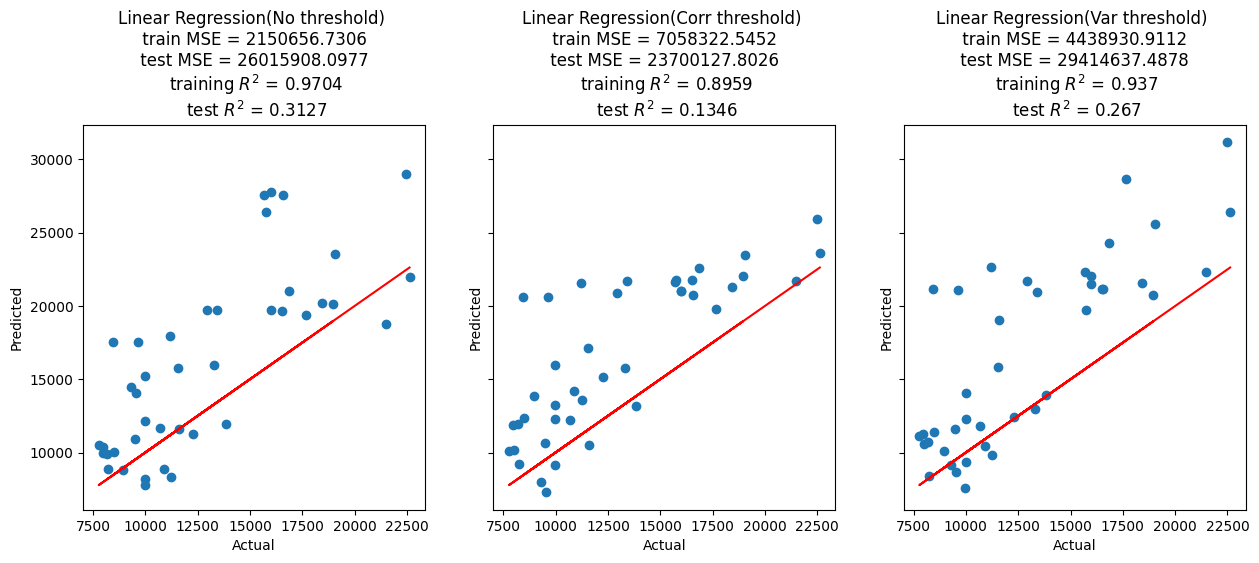

In [103]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
train_pred = [lm.predict(X_train),
              lm_corr.predict(X_corr_train),
              lm_var.predict(X_var_train)]
test_pred = [lm.predict(X_test),
             lm_corr.predict(X_corr_test),
             lm_var.predict(X_var_test)]
title = ['No threshold', 'Corr threshold', 'Var threshold']

# Key:
# No threshold – linear regression with all predictive variables
# Corr threshold – linear regression with correlation-thresholded predictive variables
# Var threshold – linear regression with variance-thresholded predictive variables


# Loop through all axes to plot each model's results
for i in range(3):
    test_mse = round(mean_squared_error(test_pred[i], y_test), 4)
    test_r2 = round(r2_score(test_pred[i], y_test), 4)
    train_mse = round(mean_squared_error(train_pred[i], y_train), 4)
    train_r2 = round(r2_score(train_pred[i], y_train), 4)
    title_str = f"Linear Regression({title[i]}) \n train MSE = {train_mse} \n " + \
                f"test MSE = {test_mse} \n training $R^{2}$ = {train_r2} \n " + \
                f"test $R^{2}$ = {test_r2}"
    ax[i].set_title(title_str)
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test, 'r')
    ax[i].scatter(y_test, test_pred[i])

We can see from the results that we have managed to **slightly improve our model by using fewer predictors**. Sometimes, it would seem less really *is* more.   

It's interesting to note that although our **training MSE** for the **"No threshold" model** was the **lowest at training**, it increases to the **highest** of the three models **at testing**.

This is a sign that the model was overfitting the data, and the **other two models** have a **better capacity for generalising** to new data.